##Building CNN model to detect Melanoma

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
#working on Google colab and connecting the drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Importing all the important libraries

In [2]:
#importing the libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import LayerNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

Importing Skin Cancer Data

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/ML/CNN'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
#getting the image counts for train and test
img_cnt_train = len(list(data_dir_train.glob('*/*.jpg')))
print(img_cnt_train)
img_cnt_test = len(list(data_dir_test.glob('*/*.jpg')))
print(img_cnt_test)

2239
118


Load using keras.preprocessing

###Create a dataset

In [5]:
#defining the parameters
batch_size = 32
img_height = 180
img_width = 180

In [6]:
#Using 80% of the images for training, and 20% for validation.
#using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
#resizing the images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
#Using 80% of the images for training, and 20% for validation.
#using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
#resizing the images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
#checking the number of images in Test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [ ]:
#listing all the classes of skin cancer and storing them in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


##Dataset Visualization

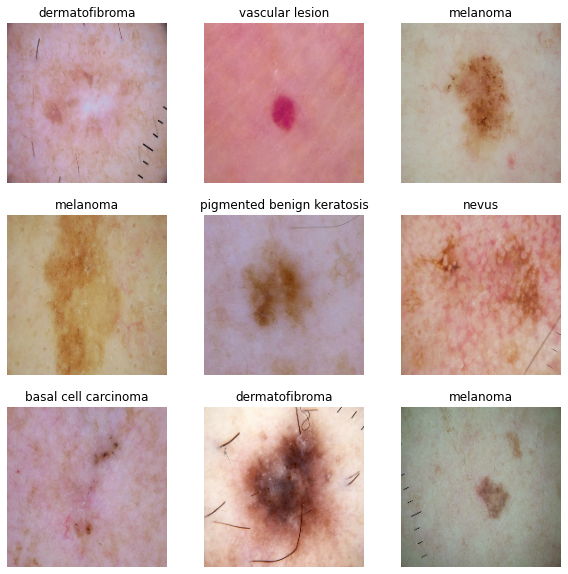

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##Model Building & training

In [ ]:
#model
num_classes = len(class_names)
# a keras convolutional layer is called Conv2D

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


Compile the model

In [ ]:
# usual cross entropy loss
# choose optimiser as adam
# metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train the model

In [ ]:
# fit the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 826s 981ms/step - loss: 1.9158 - accuracy: 0.2749 - val_loss: 1.7914 - val_accuracy: 0.3474
Epoch 2/20
169/169 [==============================] - 4s 24ms/step - loss: 1.4179 - accuracy: 0.4707 - val_loss: 1.3182 - val_accuracy: 0.5093
Epoch 3/20
169/169 [==============================] - 4s 23ms/step - loss: 1.2211 - accuracy: 0.5523 - val_loss: 1.4285 - val_accuracy: 0.4603
Epoch 4/20
169/169 [==============================] - 4s 23ms/step - loss: 0.9850 - accuracy: 0.6441 - val_loss: 1.0384 - val_accuracy: 0.6244
Epoch 5/20
169/169 [==============================] - 4s 23ms/step - loss: 0.8506 - accuracy: 0.6947 - val_loss: 0.9679 - val_accuracy: 0.6793
Epoch 6/20
169/169 [==============================] - 4s 23ms/step - loss: 0.6472 - accuracy: 0.7687 - val_loss: 0.8727 - val_accuracy: 0.7268
Epoch 7/20
169/169 [==============================] - 4s 23ms/step - loss: 0.5286 - accuracy: 0.8108 - val_loss: 1.1486 - val_accuracy: 0.6

Visualizing training results

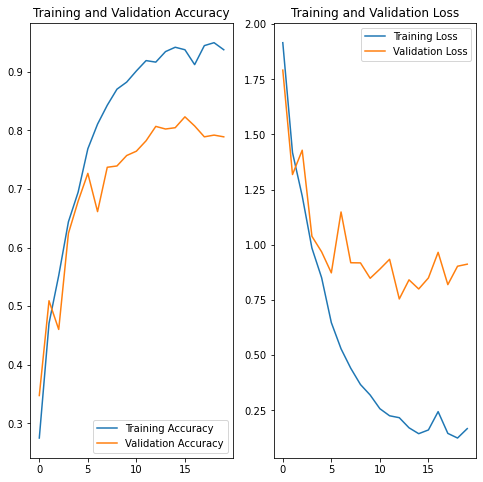

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###My Observations:


* The training accuracy is over 85% where as the validation accuracy is 55-57%

* The Training loss is 0.2 where as the validation loss is 2.2

* Above graph tells the training accuracy is continuously increasing after each epochs but the validation accuracy is not increasing after cetain point.

* Above graph also tells the training loss is continuously decresing after each epochs but the validation loss reduced till some point and continously increased after certain point.

* This clearly tell there is overfit in the model and need aufmentation strategy.

###Data Augmentation to resolve overfitting

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal",
                                                  input_shape=(img_height, img_width, 3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

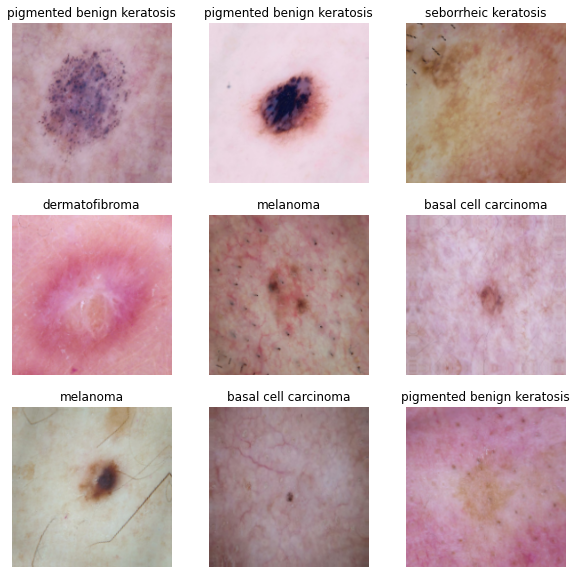

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax= plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Model Building & training

In [ ]:
#model
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compiling the model

In [ ]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [ ]:
# fit the model
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 6s 27ms/step - loss: 2.0021 - accuracy: 0.2264 - val_loss: 1.7684 - val_accuracy: 0.3244
Epoch 2/20
169/169 [==============================] - 4s 26ms/step - loss: 1.5775 - accuracy: 0.3865 - val_loss: 1.3920 - val_accuracy: 0.4670
Epoch 3/20
169/169 [==============================] - 4s 26ms/step - loss: 1.4054 - accuracy: 0.4633 - val_loss: 1.3127 - val_accuracy: 0.4922
Epoch 4/20
169/169 [==============================] - 4s 26ms/step - loss: 1.3134 - accuracy: 0.5020 - val_loss: 1.2859 - val_accuracy: 0.5041
Epoch 5/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2804 - accuracy: 0.5137 - val_loss: 1.2864 - val_accuracy: 0.4944
Epoch 6/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2195 - accuracy: 0.5397 - val_loss: 1.2266 - val_accuracy: 0.5382
Epoch 7/20
169/169 [==============================] - 4s 26ms/step - loss: 1.1723 - accuracy: 0.5577 - val_loss: 1.1906 - val_accuracy: 0.5523

Visualizing the results

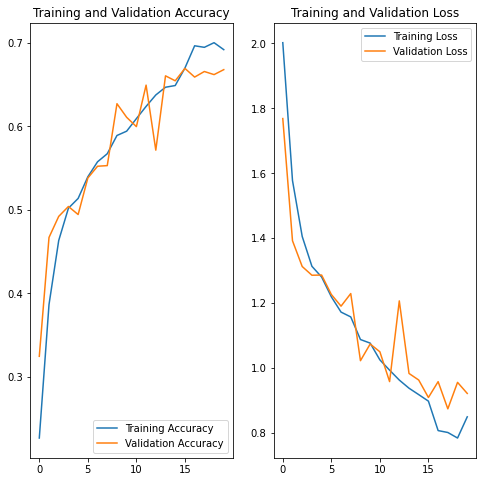

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Class distribution

Finding the number of samples:

<Figure size 576x432 with 0 Axes>

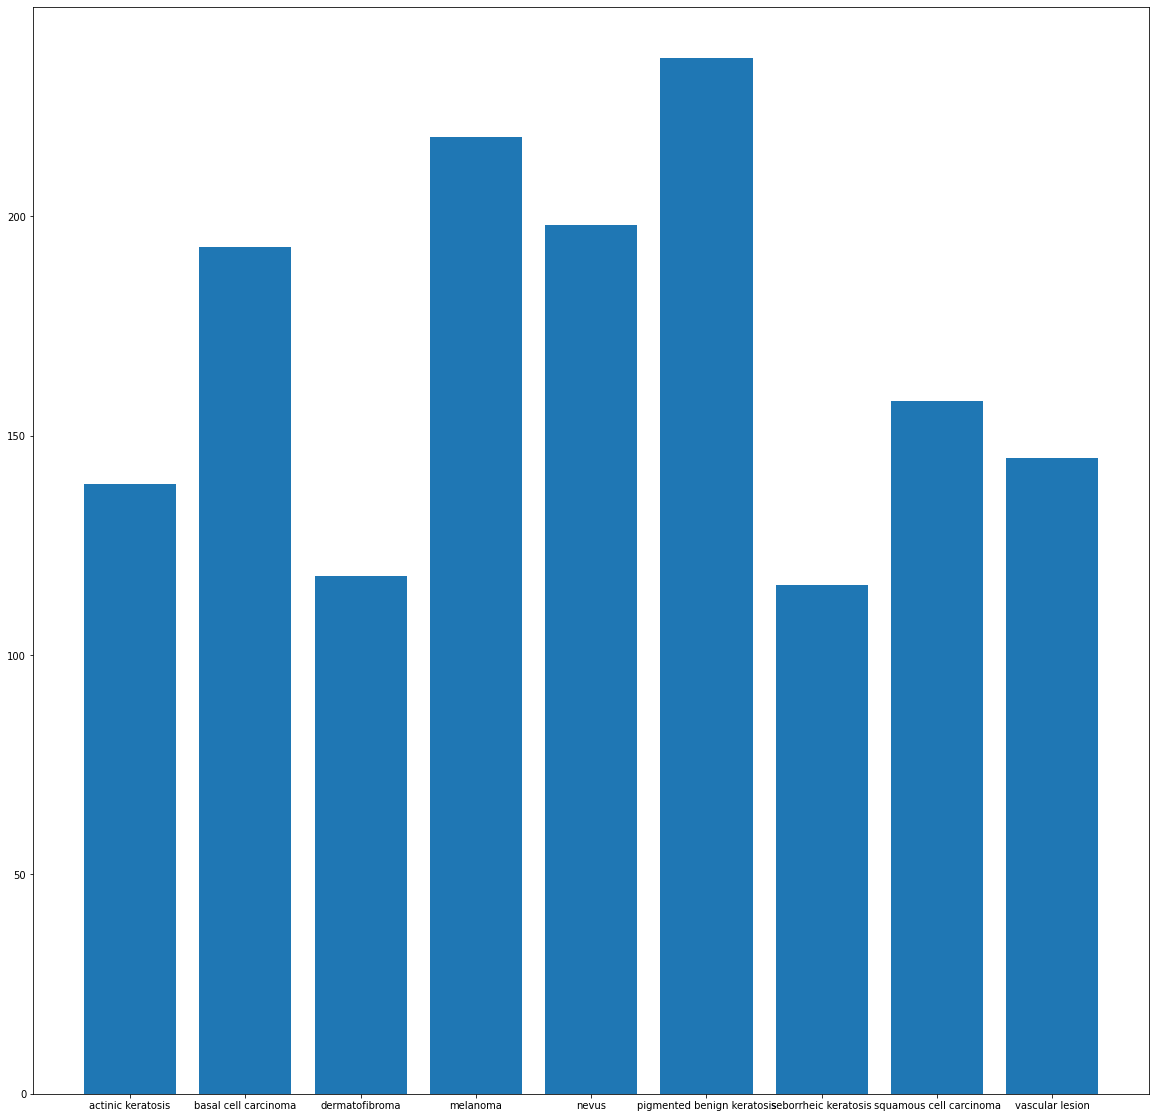

In [ ]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(8, 6))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

- Which class has the least number of samples? - **Actinic Keratosos and Seborrheic keratosis**
- Which classes dominate the data in terms proportionate number of samples? **Pigmented benign keratosis dominates the data in terms proportionate number of samples.**

##Handling class imbalances

In [ ]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/ML/CNN/Train/"
# data_dir_train = pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500, multi_threaded=False) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/actinic keratosis/output.

Processing ISIC_0030142.jpg: 100%|██████████| 500/500 [00:38<00:00, 13.06 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/basal cell carcinoma/output.

Processing ISIC_0029515.jpg: 100%|██████████| 500/500 [00:29<00:00, 17.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/dermatofibroma/output.

Processing ISIC_0025771.jpg: 100%|██████████| 500/500 [00:29<00:00, 17.18 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/melanoma/output.

Processing ISIC_0000533.jpg: 100%|██████████| 500/500 [02:07<00:00,  3.92 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/nevus/output.

Processing ISIC_0000506.jpg: 100%|██████████| 500/500 [01:54<00:00,  4.35 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/pigmented benign keratosis/output.

Processing ISIC_0025312.jpg: 100%|██████████| 500/500 [00:28<00:00, 17.39 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/seborrheic keratosis/output.

Processing ISIC_0010898.jpg: 100%|██████████| 500/500 [01:04<00:00,  7.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/squamous cell carcinoma/output.

Processing ISIC_0031940.jpg: 100%|██████████| 500/500 [00:28<00:00, 17.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/vascular lesion/output.

Processing ISIC_0027159.jpg: 100%|██████████| 500/500 [00:28<00:00, 17.79 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(path_list))
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(path_list_new))

2239
9000


In [ ]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(lesion_list_new)

['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'me

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list, lesion_list))

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [8]:
new_df['Label'].value_counts()

NameError: ignored

##Model Building & training

Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset

In [ ]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/ML/CNN/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


Create CNN model (including normalization)

In [ ]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compile your model (choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# fit the model
epochs = 50
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs
)

Epoch 1/50
281/281 [==============================] - 50s 172ms/step - loss: 1.9068 - accuracy: 0.3548 - val_loss: 2.5845 - val_accuracy: 0.1607
Epoch 2/50
281/281 [==============================] - 46s 162ms/step - loss: 1.4347 - accuracy: 0.4379 - val_loss: 1.4282 - val_accuracy: 0.4295
Epoch 3/50
281/281 [==============================] - 47s 164ms/step - loss: 1.3794 - accuracy: 0.4473 - val_loss: 1.4969 - val_accuracy: 0.4188
Epoch 4/50
281/281 [==============================] - 46s 162ms/step - loss: 1.3005 - accuracy: 0.4842 - val_loss: 1.7461 - val_accuracy: 0.3725
Epoch 5/50
281/281 [==============================] - 47s 163ms/step - loss: 1.2448 - accuracy: 0.5041 - val_loss: 1.7242 - val_accuracy: 0.3787
Epoch 6/50
281/281 [==============================] - 46s 162ms/step - loss: 1.2149 - accuracy: 0.5113 - val_loss: 1.3880 - val_accuracy: 0.4637
Epoch 7/50
281/281 [==============================] - 47s 164ms/step - loss: 1.1647 - accuracy: 0.5336 - val_loss: 1.7461 - val_ac

Visualize the model results

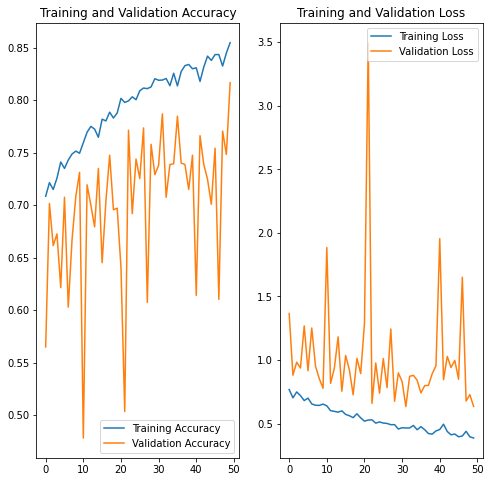

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- The above graph shows we have better model.
- The Training accuracy and Validation accuracy before and after is improved. 
- The Training Loss and Validation loss is decreased gradually.
- Tried Batch Normalization and Augmentation to improve the model accuracy and get rid of overfitting.